<h2><center>THE CHINESE UNIVERSITY OF HONG KONG<br /> 
    Department of Mathematics<br />
 MATH4280<br />
    Innovation and Design in Big Data Analytics</center></h2>

# LAB ASSIGNMENT ACTIVITY 10

# Question 1

We create the input data by summing three different functions and one noise:<br/>
$f_1(x,t) = \text{sech}(x-2)\exp(i2.3t)$<br/>
$f_2(x,t) = 2\text{sech}(x)\tanh(x+2)\exp(i1.5t)$.<br/>
$f_3(x,t) = 1.5\text{sech}(x+2)\tanh(x+3)\exp(i3.5t)$.<br/>
<br/>
$f=f_1(x,t)+f_2(x,t)+f_3(x,t)+\text{noise}$

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from pydmd import DMD


In [21]:
def f1(x,t): 
    return 1./np.cosh(x-2)*np.exp(2.3j*t)

def f2(x,t):
    return 2./np.cosh(x)*np.tanh(x+2)*np.exp(1.5j*t)

def f3(x,t):
    return 1.5/np.cosh(x+2)*np.tanh(x+3)*np.exp(3.5j*t)


x = np.linspace(-5, 5, 128)
t = np.linspace(0, 4*np.pi, 256)

xgrid, tgrid = np.meshgrid(x, t)

X1 = f1(xgrid, tgrid)
X2 = f2(xgrid, tgrid)
X3 = f3(xgrid, tgrid)
noise = np.random.normal(0.0, 0.4, size=xgrid.shape)
X = X1 + X2 + X3 + noise

<ipython-input-22-45783fd9c7e0>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(xgrid, tgrid, d.real)


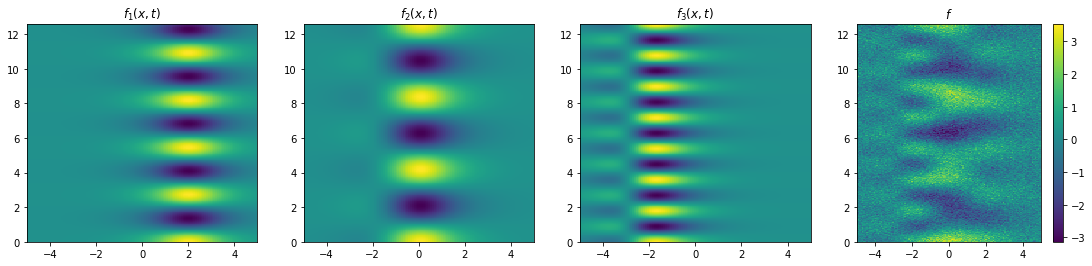

In [22]:
titles = ['$f_1(x,t)$', '$f_2(x,t)$','$f_3(x,t)$', '$f$']
data = [X1, X2, X3, X]

fig = plt.figure(figsize=(19,4))
for n, title, d in zip(range(141,145), titles, data):
    plt.subplot(n)
    plt.pcolor(xgrid, tgrid, d.real)
    plt.title(title)
plt.colorbar()
plt.show()

Apply the DMD to the collected data such that the relative error is smaller than 0.1. 

You may need to adjust the arguments of `DMD`, e.g. `svd_rank`, `tlsq_rank`.

Relative error = 0.08312952498674636


<ipython-input-23-36acb815f4b5>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(xgrid, tgrid, dmd.reconstructed_data.T.real)


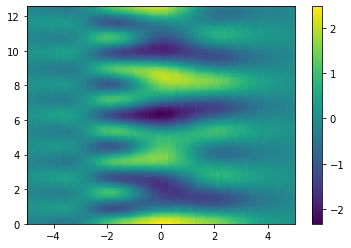

In [23]:
## answer 1

# dmd = DMD(svd_rank=3, tlsq_rank=3, exact=True, opt=True)
dmd = DMD(svd_rank=3, tlsq_rank=3)
dmd.fit(X.T)

print('Relative error =', np.linalg.norm((X1 + X2 + X3 -dmd.reconstructed_data.T))/np.linalg.norm(X1 + X2 + X3))

plt.pcolor(xgrid, tgrid, dmd.reconstructed_data.T.real)
plt.colorbar()

plt.show()

## Question 2



(15, 506)

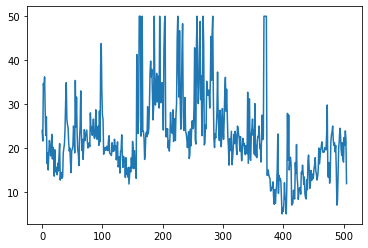

In [24]:
from numpy import sqrt
from pandas import read_csv
from pydmd import DMD
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import scipy.integrate

df = read_csv('housing_price.csv')
data=np.array(df).T
plt.plot(data[-1,:])
data.shape

We look at the `housing` dataset. It contains variables related to the housing price. The last row of `data` is the time series of the housing price.


The data is structured like this:
$${\bf D}=\left[\begin{array}{cccc}{\bf x_0} & {\bf x_1} &\cdots & {\bf x_{505}}\\
p_0 & p_1 &\cdots& p_{505}\end{array}\right]$$

where $\bf x_t$ is a column vector of some related variables (e.g. size of the flat, rating etc) and $p_t$ is the housing price at time $t$.

Apply DMD to `data` and find `svd_rank` so that the relative error of reconstructed data is less than 0.4.

In [46]:
## answer 2a
errors=np.zeros(20)
for i,svd_rank in enumerate(range(1,21)):
    dmd=DMD(svd_rank=svd_rank)
    dmd.fit(data)
    errors[i]=np.linalg.norm(dmd.reconstructed_data.real-data)/np.linalg.norm(data)
print(f'The optimal svd_rank is {np.where(errors==min(errors))[0][0]+1} with relative error = {min(errors)}')

The optimal svd_rank is 15 with relative error = 0.3493427542702503


What is the relative error for the housing price time series (the last row of `data`) for that `svd_rank`?

In [47]:
## answer 2b
dmd=DMD(svd_rank=14)
dmd.fit(data)
error=np.linalg.norm(dmd.reconstructed_data.real[-1,:]-data[-1,:])/np.linalg.norm(data[-1,:])
print(f'relative error for the housing price reconstruction: {error}')

relative error for the housing price reconstruction: 0.4763767661643208


If we only look at the first 20 days, say
$$D_{20} = \begin{bmatrix}\mathbf{x}_0 & \cdots &\mathbf{x}_{19}\\
p_0 & \cdots & p_{19}
\end{bmatrix}$$

Apply DMD with a suitable `svd_rank` (within 1 and 14).

Make the DMD delta time a quarter of the original and extend the temporal window to  $[0,2t_{org}]$, where $t_{org}$ indicates the time when the last snapshot was caught.

Plot the resultant figure along with the original data.

The desired svd_rank is 11. The relative error is 0.05888376157016663.


C:\ProgramData\Anaconda3\lib\site-packages\pydmd\snapshots.py:72: UserWarning: Input data condition number 2.3898959129858417e+18. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


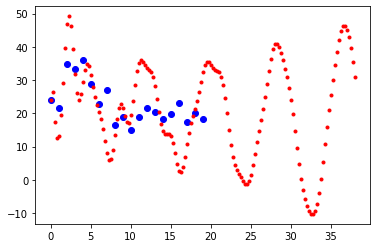

In [48]:
## answer 2c
errors=np.zeros(20)
for i,svd_rank in enumerate(range(1,21)):
    dmd=DMD(svd_rank=svd_rank,tlsq_rank=0)
    dmd.fit(data[:,:20])
    errors[i]=np.linalg.norm(dmd.reconstructed_data-data[:,:20])/np.linalg.norm(data[:,:20])
min_svd_rank = np.where(errors==min(errors))[0][0]+1
print(f'The desired svd_rank is {min_svd_rank}. The relative error is {min(errors)}.')
dmd=DMD(svd_rank=14,tlsq_rank=0)
dmd.fit(data[:,:20])
dmd.dmd_time['dt'] *= 0.25
dmd.dmd_time['tend'] *= 2
plt.plot(dmd.original_timesteps, data.real[-1,:20],'bo')
plt.plot(dmd.dmd_timesteps, dmd.reconstructed_data.real[-1,:],'r.')
plt.show()

Now, we want to only model the time series of `housing_price`, instead of the whole data matrix. 

Denote the time series by $(p_0,p_1,\cdots,p_T)$. We can form the Hankel matrix by

$$\begin{align*}
H = \left[\begin{array}{cccccc}
p_0 & p_1 & p_2 & \cdots & p_{T-k} & p_{T-k+1} \\
p_1 & p_2 & p_3 & \cdots & p_{T-k+1} & p_{T-k+2} \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
p_{k-1} & p_k & p_{k+1} & \cdots & p_{T-1} & p_{T}
\end{array}\right]
\end{align*}$$

Simply put, each column of $H$ records a window of $k$ consecutive values of the series. 

Now complete the function `hankel` to construct the Hankel matrix, given a one-dimensional array `ts` denoting the time series and the window size `k`.



In [49]:
housing_price=data[-1,:]
def hankel(ts,k):
    ## answer of 2d
    
    result=np.zeros((k,ts.shape[0]-k+1))
    for i in range(result.shape[1]):
        result[:,i]=ts[i:i+k]
        
    return result

tmp=housing_price.shape[0]
x=np.array([i for i in range(tmp)])
X=hankel(x,10)

By applying DMD to $H$, we are approximating the matrix $\bf A$,
$$\begin{align*}
\left[\begin{array}{cccc}
p_1 & p_2 & \cdots & p_{T-k+1} \\
p_2 & p_3 & \cdots & p_{T-k+2} \\
\vdots & \vdots & \vdots & \vdots \\
p_{k} & p_{k+1} & \cdots & p_{T} \end{array}\right]
\approx {\bf A}
\left[\begin{array}{cccc}
p_0 & p_1 & \cdots & p_{T-k} \\
p_1 & p_2 & \cdots & p_{T-k+1} \\
\vdots & \vdots & \vdots & \vdots \\
p_{k-1} & p_{k} & \cdots & p_{T-1} \end{array}\right]
\end{align*}$$

Now if we fix `svd_rank=14` and `k`$=10,20,50,100$ or $200$, what is the optimal value for the window size `k` so that the relative reconstruction error is minimal?

In [51]:
## answer of 2e

errors=np.zeros(5)
ws=[10,20,50,100,200]
for i,k in enumerate(ws):
    dmd=DMD(svd_rank=14)
    H=hankel(housing_price,k)
    dmd.fit(H)
    errors[i]=np.linalg.norm(dmd.reconstructed_data-H)/np.linalg.norm(H)
print(f'The optimal window size is {ws[np.where(errors==min(errors))[0][0]]} with relative error = {min(errors)}')

The optimal window size is 200 with relative error = 0.27851090370869375
